In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('ecommerce_dataset.csv')
df.head()

,OrderID,CustomerID,Gender,Age,ProductCategory,ProductName,Quantity,PricePerUnit,OrderDate,City,PaymentMethod,DeliveryStatus,CustomerRating,TotalPrice
0,ORD1000,CUST160,Other,27,Clothing,Perfume,4,155.05,2023-10-04,Durban,Cash,Delivered,2,620.20
1,ORD1001,CUST120,Male,36,Clothing,Puzzle,4,135.24,2023-06-05,Durban,Cash,Delivered,3,540.96
2,ORD1002,CUST172,Other,49,Books,Doll,1,183.27,2023-09-05,Port Elizabeth,Cash,Delivered,4,183.27
3,ORD1003,CUST154,Other,18,Books,Blender,3,48.38,2023-08-06,Port Elizabeth,Credit Card,Pending,5,145.14
4,ORD1004,CUST172,Male,22,Beauty,Shirt,1,468.79,2023-07-09,Port Elizabeth,Credit Card,Pending,2,468.79


In [27]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['OrderMonth'] = df['OrderDate'].dt.month
df[['OrderDate', 'OrderMonth']].head()


,OrderDate,OrderMonth
0,2023-10-04,10
1,2023-06-05,6
2,2023-09-05,9
3,2023-08-06,8
4,2023-07-09,7


In [35]:
df['OrderMonth'] = df['OrderDate'].dt.month
df['OrderYear'] = df['OrderDate'].dt.year 
df.head()

,OrderID,CustomerID,Gender,Age,ProductCategory,ProductName,Quantity,PricePerUnit,OrderDate,City,PaymentMethod,DeliveryStatus,CustomerRating,TotalPrice,OrderMonth,OrderYear
0,ORD1000,CUST160,Other,27,Clothing,Perfume,4,155.05,2023-10-04,Durban,Cash,Delivered,2,620.20,10,2023
1,ORD1001,CUST120,Male,36,Clothing,Puzzle,4,135.24,2023-06-05,Durban,Cash,Delivered,3,540.96,6,2023
2,ORD1002,CUST172,Other,49,Books,Doll,1,183.27,2023-09-05,Port Elizabeth,Cash,Delivered,4,183.27,9,2023
3,ORD1003,CUST154,Other,18,Books,Blender,3,48.38,2023-08-06,Port Elizabeth,Credit Card,Pending,5,145.14,8,2023
4,ORD1004,CUST172,Male,22,Beauty,Shirt,1,468.79,2023-07-09,Port Elizabeth,Credit Card,Pending,2,468.79,7,2023


In [64]:
monthly_revenue = df.groupby(['OrderMonth'])['TotalPrice'].sum().reset_index()
monthly_revenue.head()

,OrderMonth,TotalPrice
0,1,18258.70
1,2,28632.92
2,3,28903.71
3,4,30121.64
4,5,29651.43


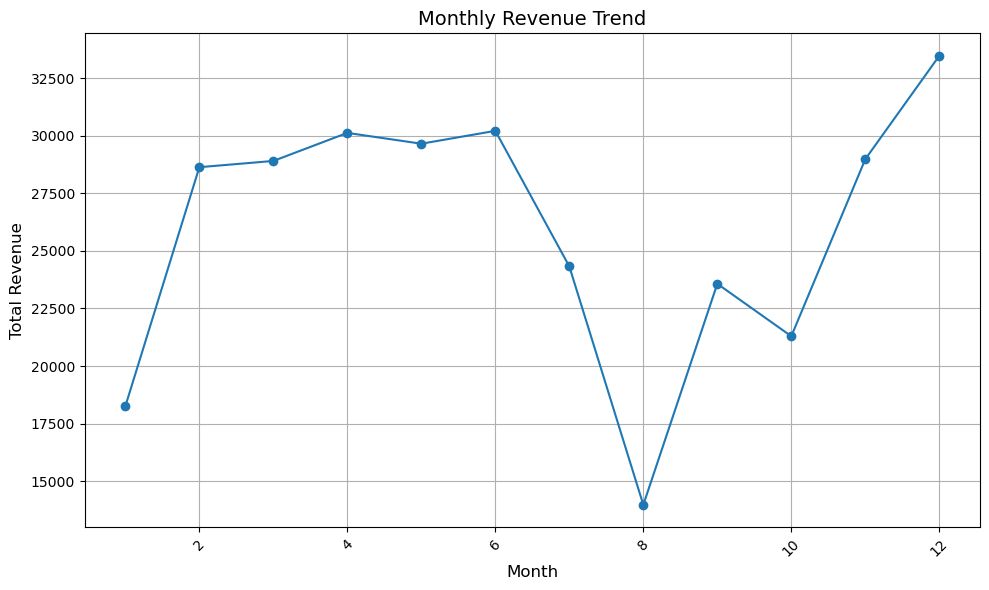

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['OrderMonth'], monthly_revenue['TotalPrice'], marker='o')
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [66]:
plt.show()
df.head()

,OrderID,CustomerID,Gender,Age,ProductCategory,ProductName,Quantity,PricePerUnit,OrderDate,City,PaymentMethod,DeliveryStatus,CustomerRating,TotalPrice,OrderMonth,OrderYear
0,ORD1000,CUST160,Other,27,Clothing,Perfume,4,155.05,2023-10-04,Durban,Cash,Delivered,2,620.20,10,2023
1,ORD1001,CUST120,Male,36,Clothing,Puzzle,4,135.24,2023-06-05,Durban,Cash,Delivered,3,540.96,6,2023
2,ORD1002,CUST172,Other,49,Books,Doll,1,183.27,2023-09-05,Port Elizabeth,Cash,Delivered,4,183.27,9,2023
3,ORD1003,CUST154,Other,18,Books,Blender,3,48.38,2023-08-06,Port Elizabeth,Credit Card,Pending,5,145.14,8,2023
4,ORD1004,CUST172,Male,22,Beauty,Shirt,1,468.79,2023-07-09,Port Elizabeth,Credit Card,Pending,2,468.79,7,2023


In [69]:
highest_revenue_month = monthly_revenue.idxmax()
highest_revenue_value = monthly_revenue.max()
#highest_revenue_month.head()

In [68]:
print(f"The month with the highest total revenue is: {highest_revenue_month} with revenue of {highest_revenue_value}")

The month with the highest total revenue is: OrderMonth    11
TotalPrice    11
dtype: int64 with revenue of OrderMonth       12.00
TotalPrice    33467.98
dtype: float64


In [50]:
category_stats = df.groupby('ProductCategory').agg(
    AvgRating=('CustomerRating', 'mean'),
    TotalRevenue=('TotalPrice', 'sum')
).reset_index()
category_stats.head()

,ProductCategory,AvgRating,TotalRevenue
0,Beauty,3.012048,55779.00
1,Books,3.284091,46149.75
2,Clothing,2.807692,48320.34
3,Electronics,2.709302,52399.18
4,Home,3.027778,43974.77


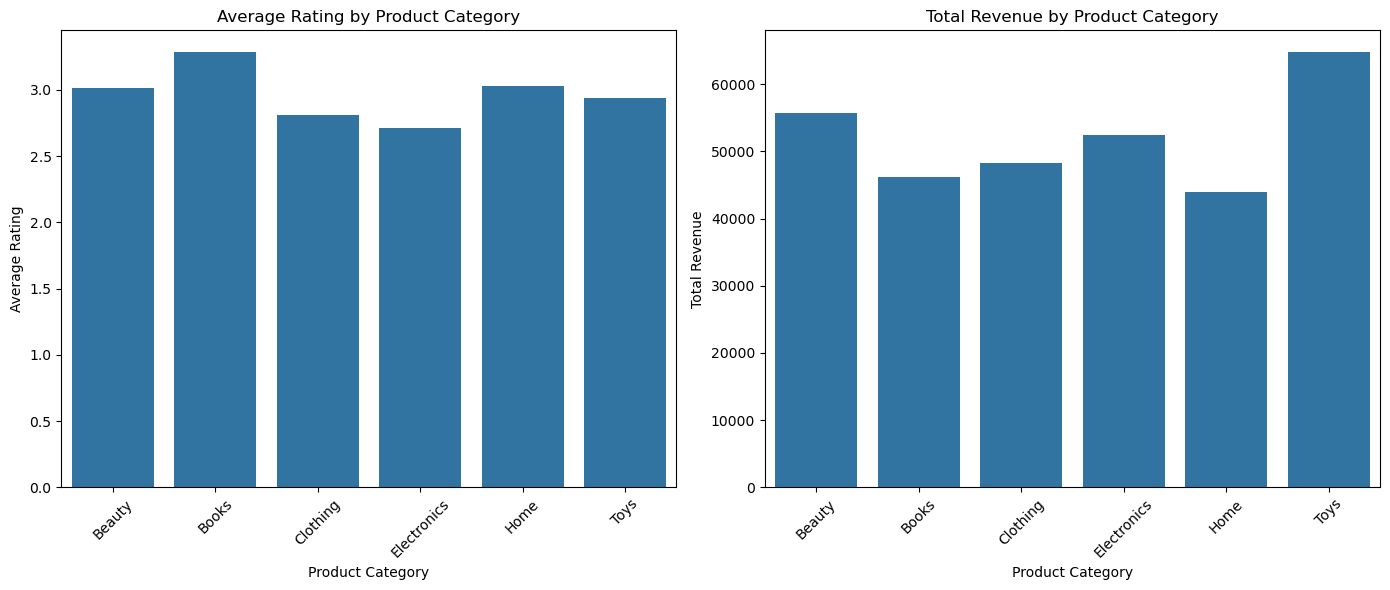

In [72]:
fig, ax1 = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='ProductCategory', y='AvgRating', data=category_stats, ax=ax1[0])
ax1[0].set_title('Average Rating by Product Category')
ax1[0].set_ylabel('Average Rating')
ax1[0].set_xlabel('Product Category')
ax1[0].tick_params(axis='x', rotation=45)

sns.barplot(x='ProductCategory', y='TotalRevenue', data=category_stats, ax=ax1[1])
ax1[1].set_title('Total Revenue by Product Category')
ax1[1].set_ylabel('Total Revenue')
ax1[1].set_xlabel('Product Category')
ax1[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




In [73]:
highest_rated_category = category_stats.loc[category_stats['AvgRating'].idxmax()]
highest_revenue_category = category_stats.loc[category_stats['TotalRevenue'].idxmax()]

In [74]:
print(f"Highest-rated category: {highest_rated_category['ProductCategory']} with Avg Rating of {highest_rated_category['AvgRating']}")
print(f"Highest revenue category: {highest_revenue_category['ProductCategory']} with Total Revenue of {highest_revenue_category['TotalRevenue']}")

Highest-rated category: Books with Avg Rating of 3.284090909090909
Highest revenue category: Toys with Total Revenue of 64776.6


In [79]:
payment_method_count = df['PaymentMethod'].value_counts()
payment_method_count.head()


PaymentMethod
Credit Card      123
PayPal           106
Cash              96
Debit Card        92
Bank Transfer     83
Name: count, dtype: int64

In [78]:
payment_method_revenue = df.groupby('PaymentMethod')['TotalPrice'].sum()
payment_method_revenue.head()


PaymentMethod
Bank Transfer    52621.56
Cash             56861.52
Credit Card      78658.50
Debit Card       53024.73
PayPal           70233.33
Name: TotalPrice, dtype: float64

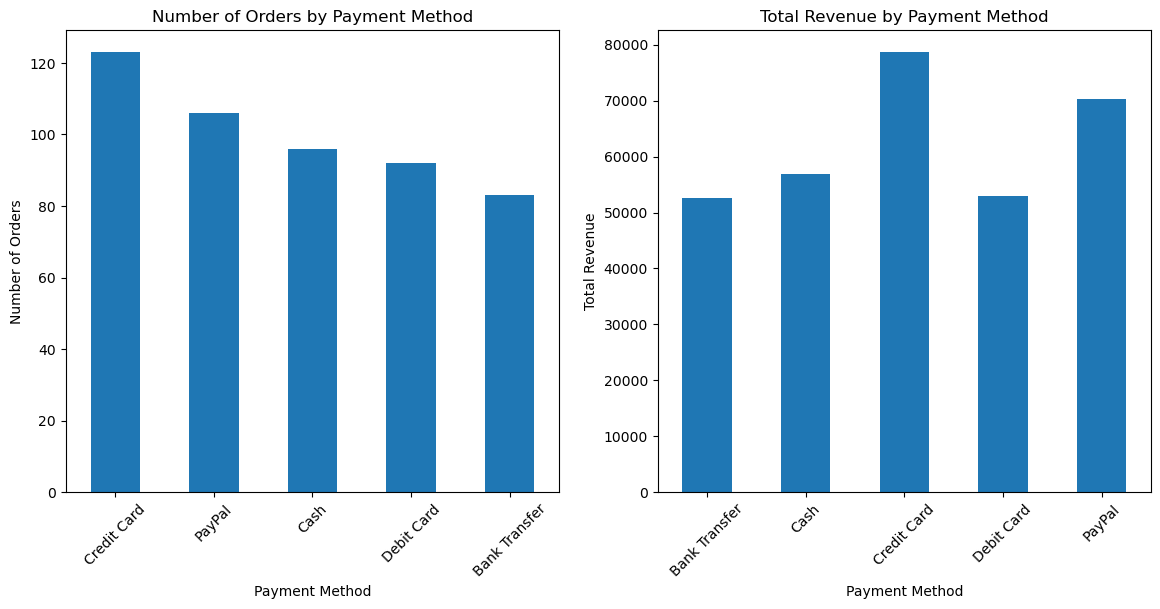

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
payment_method_count.plot(kind='bar', ax=ax1)
ax1.set_title('Number of Orders by Payment Method')
ax1.set_ylabel('Number of Orders')
ax1.set_xlabel('Payment Method')
ax1.tick_params(axis='x', rotation=45)

payment_method_revenue.plot(kind='bar', ax=ax2)
ax2.set_title('Total Revenue by Payment Method')
ax2.set_ylabel('Total Revenue')
ax2.set_xlabel('Payment Method')
ax2.tick_params(axis='x', rotation=45)



In [89]:
city_sales_order_value = df.groupby('City').agg(
    TotalSales=('TotalPrice', 'sum'),
    AvgOrderValue=('TotalPrice', 'mean')
).reset_index()
city_sales_order_value.head()

,City,TotalSales,AvgOrderValue
0,Cape Town,61234.09,618.526162
1,Durban,57744.81,607.840105
2,Johannesburg,66221.97,668.908788
3,Port Elizabeth,60787.20,590.166990
4,Pretoria,65411.57,628.957404


In [90]:
top_3_cities = city_sales_order_value.sort_values(by='TotalSales', ascending=False).head(3)

<BarContainer object of 3 artists>

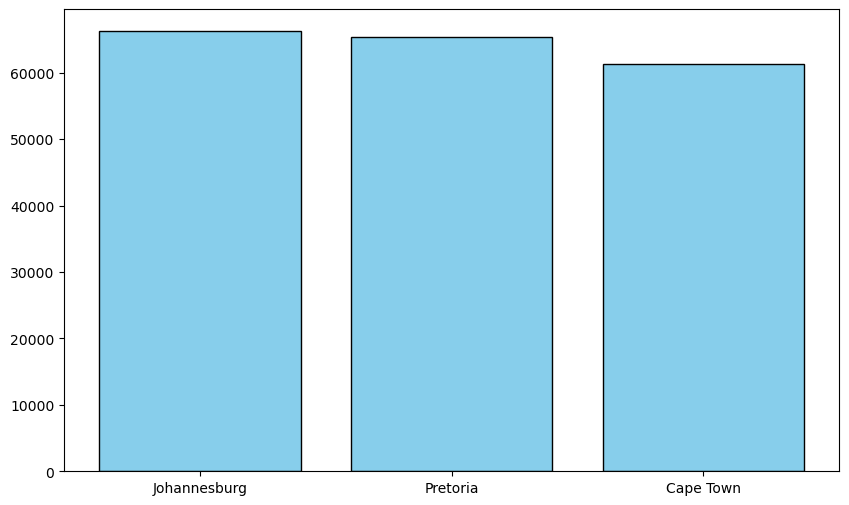

In [109]:
plt.figure(figsize=(10, 6))
plt.bar(top_3_cities['City'], top_3_cities['TotalSales'], color='skyblue', edgecolor='black')	

In [95]:
avg_ratings = df.groupby(['Gender', 'ProductCategory'])['CustomerRating'].mean().reset_index()
avg_ratings.head()

,Gender,ProductCategory,CustomerRating
0,Female,Beauty,3.281250
1,Female,Books,2.933333
2,Female,Clothing,2.518519
3,Female,Electronics,2.730769
4,Female,Home,3.150000


In [103]:
heatmap_data = avg_ratings.pivot_table(index='Gender', columns='ProductCategory', values='CustomerRating')
heatmap_data.head()

ProductCategory,Beauty,Books,Clothing,Electronics,Home,Toys
Gender,,,,,,
Female,3.281250,2.933333,2.518519,2.730769,3.150000,2.937500
Male,2.750000,3.515152,2.916667,2.689655,2.791667,3.033333
Other,2.956522,3.400000,3.000000,2.709677,3.142857,2.838710


Text(70.72222222222221, 0.5, 'Gender')

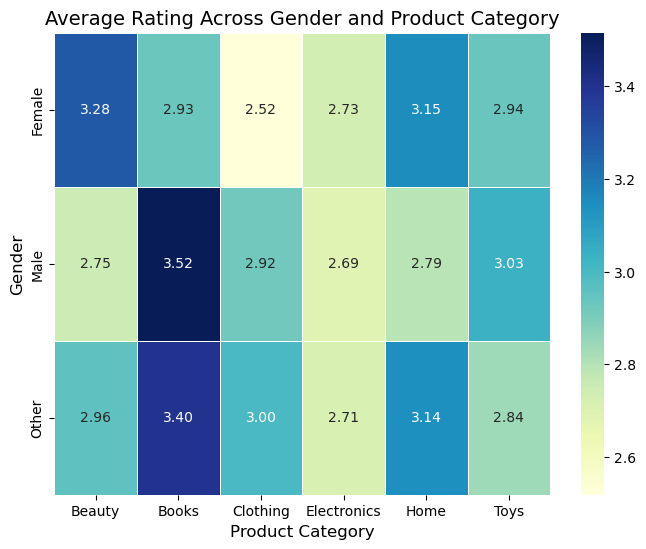

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", linewidths=0.5, fmt='.2f')
plt.title('Average Rating Across Gender and Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Gender', fontsize=12)

<Axes: xlabel='ProductCategory', ylabel='CustomerRating'>

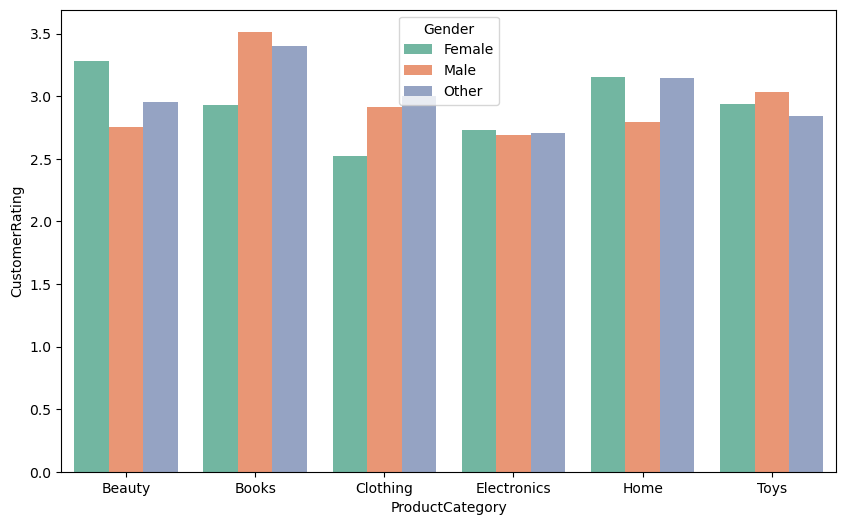

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_ratings, x='ProductCategory', y='CustomerRating', hue='Gender', palette='Set2')


In [108]:
print(avg_ratings)

    Gender ProductCategory  CustomerRating
0   Female          Beauty        3.281250
1   Female           Books        2.933333
2   Female        Clothing        2.518519
3   Female     Electronics        2.730769
4   Female            Home        3.150000
5   Female            Toys        2.937500
6     Male          Beauty        2.750000
7     Male           Books        3.515152
8     Male        Clothing        2.916667
9     Male     Electronics        2.689655
10    Male            Home        2.791667
11    Male            Toys        3.033333
12   Other          Beauty        2.956522
13   Other           Books        3.400000
14   Other        Clothing        3.000000
15   Other     Electronics        2.709677
16   Other            Home        3.142857
17   Other            Toys        2.838710
